This is the start of project 1: This project will take the input data of different muscle sensors to predict 4 different hand positions. This data is retrieved from kraggle, later on data will be grabbed from actual muscle sensros in lab, right now however the ablity to redord motions and values has not been implemented.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import classification_report

maxEpoch = 100 #making this a global variable because this way i can change all runs faster

The block of code holds all the pandas related stuff, the next section will handle converting the pandas dataframe to a numpy array and processing (normalizing the data)

Gesture classes were : rock - 0, scissors - 1, paper - 2, ok - 3. 

In [35]:

# this section of code was harder to solve than orgianally expected, as the contac did not let me use some of the function that i needed to use, 
# To solve this i had to make a new csv, and then drop a extra row that was added in the process, after that everything seemed to fall into place.
cols = [                                                    
'm1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8',
'm2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8',
'm3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8',
'm4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8',
'm5s1','m5s2','m5s3','m5s4','m5s5','m5s6','m5s7','m5s8',
'm6s1','m6s2','m6s3','m6s4','m6s5','m6s6','m6s7','m6s8',
'm7s1','m7s2','m7s3','m7s4','m7s5','m7s6','m7s7','m7s8',
'm8s1','m8s2','m8s3','m8s4','m8s5','m8s6','m8s7','m8s8','gesture']          #differnt column labels, m=muscle, s=sensor so m1s1 is muscle 1 sensor 1, and continues so on
df0 = pd.read_csv('archive1/0.csv')   #grab the data from csv0
df1 = pd.read_csv('archive1/1.csv')   #grab the data from csv1
df2 = pd.read_csv('archive1/2.csv')   #grab the data from csv2
df3 = pd.read_csv('archive1/3.csv')   #grab the data from csv3
df0.columns = cols #set up the columns
df1.columns = cols #set up the columns
df2.columns = cols #set up the columns
df3.columns = cols #set up the columns


frames = [df0, df1, df2, df3] #put all the frames in a list
temp = pd.concat(frames) #combine all the frames into one dataframe
temp.to_csv("input.csv") #write this new dataframe into a csv so that it can be processed better
dataframe = pd.read_csv("input.csv") #read the new csv back into the program



dataframe.drop( columns=dataframe.columns[0], axis=1,inplace=True) #the procesign of writing the other csvs into a big one, added the number column which was wrong so here we drop it
display(dataframe) #show a sample of the data

dataframe = dataframe.sample(frac=1)


display(dataframe)


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
3271,8.0,2.0,-5.0,-6.0,-1.0,24.0,3.0,-10.0,38.0,2.0,...,-11.0,21.0,4.0,1.0,0.0,-13.0,-16.0,-2.0,-5.0,1
731,22.0,47.0,23.0,-9.0,-3.0,-15.0,13.0,4.0,-68.0,-73.0,...,-14.0,-7.0,-23.0,-17.0,-6.0,3.0,-26.0,-27.0,-33.0,0
11566,3.0,-4.0,-5.0,-6.0,18.0,-31.0,-8.0,0.0,-3.0,-4.0,...,8.0,0.0,-6.0,-3.0,-4.0,1.0,-7.0,-7.0,-2.0,3
8951,-5.0,5.0,5.0,4.0,8.0,45.0,25.0,15.0,7.0,3.0,...,0.0,-5.0,-4.0,-1.0,1.0,5.0,-23.0,-20.0,-8.0,3
6730,19.0,5.0,-1.0,-3.0,24.0,25.0,2.0,2.0,-29.0,-22.0,...,-8.0,0.0,10.0,-5.0,-11.0,0.0,-9.0,2.0,-4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,-6.0,-2.0,-4.0,-7.0,1.0,-17.0,-6.0,-8.0,9.0,-2.0,...,-9.0,-6.0,-4.0,-5.0,-5.0,-5.0,-10.0,-10.0,1.0,3
8915,-9.0,-3.0,-4.0,-4.0,14.0,-7.0,-12.0,-9.0,6.0,2.0,...,4.0,5.0,7.0,5.0,11.0,12.0,84.0,13.0,-6.0,3
1761,-7.0,-2.0,-11.0,-6.0,-13.0,5.0,7.0,-11.0,2.0,-1.0,...,3.0,3.0,-1.0,-3.0,-5.0,8.0,-3.0,-11.0,-7.0,0
7734,9.0,33.0,-10.0,0.0,-7.0,-9.0,0.0,14.0,-15.0,-25.0,...,-10.0,1.0,9.0,8.0,2.0,11.0,7.0,-1.0,-3.0,2


In [36]:
from sklearn.model_selection import train_test_split
display(dataframe)
#df.loc[:, df.columns != col]
allX = dataframe.loc[:, dataframe.columns != "gesture"]
allY = dataframe["gesture"]


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)


# trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
# testX = testX.reshape((testX.shape[0], 32 * 32 * 3))
# valX = valX.reshape((valX.shape[0], 32 * 32 * 3))

trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)


print(trainX.shape, " ", valX.shape, " ", testX.shape)
# convert the labels to one-hot form


# initialize the label names for the CIFAR-10 dataset
labelNames = ['Rock', 'Paper', 'Scissors', 'Ok']


#The data is first split in what will be training and validation, and testing.


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
3271,8.0,2.0,-5.0,-6.0,-1.0,24.0,3.0,-10.0,38.0,2.0,...,-11.0,21.0,4.0,1.0,0.0,-13.0,-16.0,-2.0,-5.0,1
731,22.0,47.0,23.0,-9.0,-3.0,-15.0,13.0,4.0,-68.0,-73.0,...,-14.0,-7.0,-23.0,-17.0,-6.0,3.0,-26.0,-27.0,-33.0,0
11566,3.0,-4.0,-5.0,-6.0,18.0,-31.0,-8.0,0.0,-3.0,-4.0,...,8.0,0.0,-6.0,-3.0,-4.0,1.0,-7.0,-7.0,-2.0,3
8951,-5.0,5.0,5.0,4.0,8.0,45.0,25.0,15.0,7.0,3.0,...,0.0,-5.0,-4.0,-1.0,1.0,5.0,-23.0,-20.0,-8.0,3
6730,19.0,5.0,-1.0,-3.0,24.0,25.0,2.0,2.0,-29.0,-22.0,...,-8.0,0.0,10.0,-5.0,-11.0,0.0,-9.0,2.0,-4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,-6.0,-2.0,-4.0,-7.0,1.0,-17.0,-6.0,-8.0,9.0,-2.0,...,-9.0,-6.0,-4.0,-5.0,-5.0,-5.0,-10.0,-10.0,1.0,3
8915,-9.0,-3.0,-4.0,-4.0,14.0,-7.0,-12.0,-9.0,6.0,2.0,...,4.0,5.0,7.0,5.0,11.0,12.0,84.0,13.0,-6.0,3
1761,-7.0,-2.0,-11.0,-6.0,-13.0,5.0,7.0,-11.0,2.0,-1.0,...,3.0,3.0,-1.0,-3.0,-5.0,8.0,-3.0,-11.0,-7.0,0
7734,9.0,33.0,-10.0,0.0,-7.0,-9.0,0.0,14.0,-15.0,-25.0,...,-10.0,1.0,9.0,8.0,2.0,11.0,7.0,-1.0,-3.0,2


(7004, 64)   (2335, 64)   (2335, 64)


Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 1.4301 - accuracy: 0.6368 - val_loss: 0.7085 - val_accuracy: 0.7537
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8555 - val_loss: 0.5494 - val_accuracy: 0.8120
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2070 - accuracy: 0.9260 - val_loss: 0.4472 - val_accuracy: 0.8497
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9613 - val_loss: 0.5212 - val_accuracy: 0.8544
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9786 - val_loss: 0.4132 - val_accuracy: 0.8767
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9907 - val_loss: 0.3952 - val_accuracy: 0.8839
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9973 - val_loss: 0.4011 - val_accuracy: 0.8891

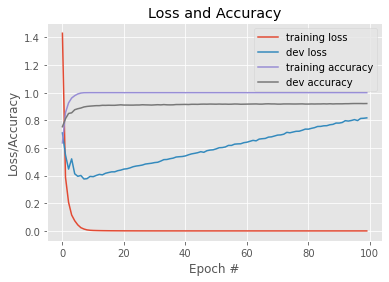

In [37]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
# maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so the first run of this code give a absolutly massive amount of overfitting. First thing I want to do is to normalize the inputs and then see what happens next


In [38]:
from sklearn import preprocessing

print(trainX.shape)
trainX = preprocessing.normalize(trainX)
testX = preprocessing.normalize(testX)
valX = preprocessing.normalize(valX)

print(trainX.min())

(7004, 64)
-0.8125616347431192


Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0478 - accuracy: 0.5744 - val_loss: 0.6583 - val_accuracy: 0.7610
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8562 - val_loss: 0.3046 - val_accuracy: 0.9006
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9286 - val_loss: 0.2225 - val_accuracy: 0.9225
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9615 - val_loss: 0.1939 - val_accuracy: 0.9315
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9719 - val_loss: 0.1839 - val_accuracy: 0.9328
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9807 - val_loss: 0.1846 - val_accuracy: 0.9379
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9886 - val_loss: 0.1894 - val_accuracy: 0.9340

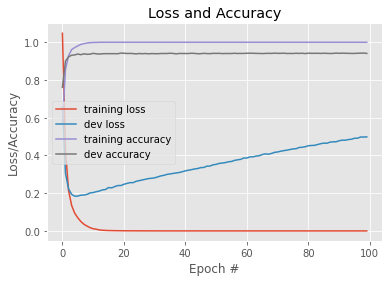

In [39]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

alright here we got some amazing results, the normalization dramatically increased the accuracy and decreased the loss. Although everything was just shifted int he right direction so the dev loss is still bad, and the model still suffers from overfitting. Things are progressing nicely. Next up, I will try the same thing again but this time with a sigmoid function.

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.4052 - accuracy: 0.2539 - val_loss: 1.4266 - val_accuracy: 0.2437
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3939 - accuracy: 0.2638 - val_loss: 1.3939 - val_accuracy: 0.2557
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3955 - accuracy: 0.2584 - val_loss: 1.3866 - val_accuracy: 0.2595
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3905 - accuracy: 0.2587 - val_loss: 1.3936 - val_accuracy: 0.2557
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3886 - accuracy: 0.2678 - val_loss: 1.3914 - val_accuracy: 0.2591
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3855 - accuracy: 0.2774 - val_loss: 1.3910 - val_accuracy: 0.2552
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3844 - accuracy: 0.2750 - val_loss: 1.3871 - val_accuracy: 0.2664

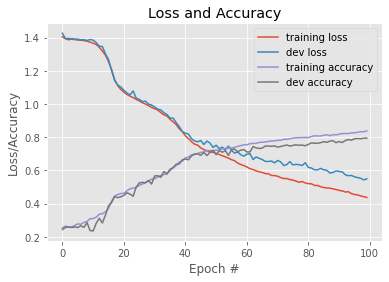

In [40]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Okay so this is interesting, although the accuracy is overall worse, the amount of over fitting is less. Next up I am going to see how tanh functions. The reason for this is that tanh is between -1 - 1 where sigmoid is only 0-1. Being I have negitive input that means that means that tanh might work better

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3942 - accuracy: 0.3017 - val_loss: 1.3834 - val_accuracy: 0.2998
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3753 - accuracy: 0.3254 - val_loss: 1.3764 - val_accuracy: 0.3315
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3686 - accuracy: 0.3439 - val_loss: 1.3726 - val_accuracy: 0.3066
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3649 - accuracy: 0.3388 - val_loss: 1.3695 - val_accuracy: 0.3345
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3635 - accuracy: 0.3427 - val_loss: 1.3668 - val_accuracy: 0.3191
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3620 - accuracy: 0.3377 - val_loss: 1.3716 - val_accuracy: 0.3143
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3593 - accuracy: 0.3494 - val_loss: 1.3697 - val_accuracy: 0.3191

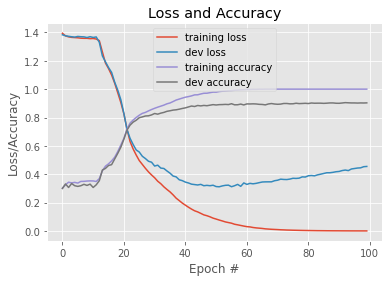

In [41]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so looking at this, while tanh had better accuracy, the problem in over fitting is  worse than relu's. The project a such will focus on sigmoid, and try to reduce the overfitting and boot the accuracy even more

being over fitting can be caused by network size, I will reduce the size of the network to 128 and 64

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3965 - accuracy: 0.2557 - val_loss: 1.3886 - val_accuracy: 0.2437
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3900 - accuracy: 0.2589 - val_loss: 1.3879 - val_accuracy: 0.2493
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3900 - accuracy: 0.2569 - val_loss: 1.3872 - val_accuracy: 0.2600
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3880 - accuracy: 0.2638 - val_loss: 1.3857 - val_accuracy: 0.2711
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3859 - accuracy: 0.2677 - val_loss: 1.3932 - val_accuracy: 0.2544
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3852 - accuracy: 0.2791 - val_loss: 1.3851 - val_accuracy: 0.2711
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3830 - accuracy: 0.2840 - val_loss: 1.3850 - val_accuracy: 0.2827

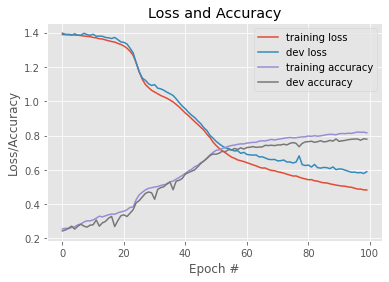

In [42]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(128, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright lets compare both of the sigmoid models that we have created(note this may be differnt from results because these images were grabbed from early run)(images must be in same path or folder as the project)



Large network:  Small network:


![largesig](sigL.png "large Network:") ![smallsig](sigS.png "Small Network:")






Alright so looking that these two graphs, the left graph is the larger sigmoid network, and the right side is the smaller network. As we can see decreasing the size of this model was a very good thing for us as while we lost a small amount of accuracy, we decreased the overfitting. Nextup I want to add an addional layer, this will increase the overfitting which is why I will also add some dropout layers in an attempt to combat this issue.

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3989 - accuracy: 0.2527 - val_loss: 1.3886 - val_accuracy: 0.2527
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3938 - accuracy: 0.2511 - val_loss: 1.3979 - val_accuracy: 0.2685
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3918 - accuracy: 0.2581 - val_loss: 1.3948 - val_accuracy: 0.2424
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3906 - accuracy: 0.2513 - val_loss: 1.3908 - val_accuracy: 0.2582
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3907 - accuracy: 0.2480 - val_loss: 1.3871 - val_accuracy: 0.2582
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3904 - accuracy: 0.2509 - val_loss: 1.3883 - val_accuracy: 0.2424
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3902 - accuracy: 0.2453 - val_loss: 1.3911 - val_accuracy: 0.2595

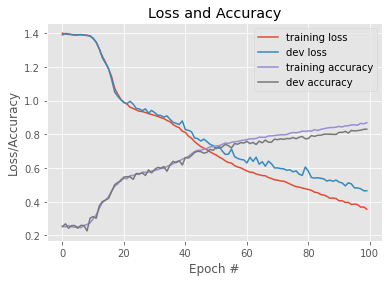

In [43]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 150
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so we got a slight increase in accuracy, but the over fitting is basically back where everything started from.


alright so we have a decreasing loss, so now I want to see if a larger number of epochs will give a different view as to what is happening with this code

Epoch 1/300
219/219 [==============================] - 2s 4ms/step - loss: 1.4024 - accuracy: 0.2470 - val_loss: 1.3874 - val_accuracy: 0.2557
Epoch 2/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3930 - accuracy: 0.2516 - val_loss: 1.3873 - val_accuracy: 0.2557
Epoch 3/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3924 - accuracy: 0.2587 - val_loss: 1.3952 - val_accuracy: 0.2424
Epoch 4/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3916 - accuracy: 0.2481 - val_loss: 1.3981 - val_accuracy: 0.2437
Epoch 5/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3899 - accuracy: 0.2594 - val_loss: 1.3859 - val_accuracy: 0.2587
Epoch 6/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3879 - accuracy: 0.2560 - val_loss: 1.3939 - val_accuracy: 0.2437
Epoch 7/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3887 - accuracy: 0.2540 - val_loss: 1.3868 - val_accuracy: 0.2437

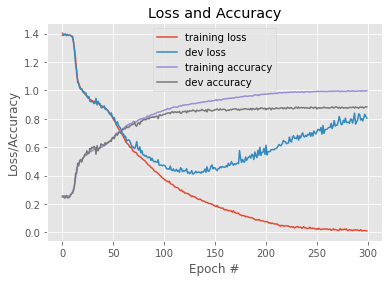

In [46]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch =300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright, so more epochs did increase the accuracy of the model. However the accuracy's plateaus at around 135 epochs. This is the best number of epochs to run at right now so 150 will be the new number of epochs we will run while training.

Epoch 1/180
219/219 [==============================] - 2s 4ms/step - loss: 1.4014 - accuracy: 0.2401 - val_loss: 1.3926 - val_accuracy: 0.2424
Epoch 2/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3919 - accuracy: 0.2541 - val_loss: 1.3939 - val_accuracy: 0.2557
Epoch 3/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3905 - accuracy: 0.2539 - val_loss: 1.3870 - val_accuracy: 0.2433
Epoch 4/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3917 - accuracy: 0.2466 - val_loss: 1.3878 - val_accuracy: 0.2437
Epoch 5/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3904 - accuracy: 0.2493 - val_loss: 1.3965 - val_accuracy: 0.2424
Epoch 6/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3909 - accuracy: 0.2529 - val_loss: 1.3867 - val_accuracy: 0.2591
Epoch 7/180
219/219 [==============================] - 1s 3ms/step - loss: 1.3920 - accuracy: 0.2534 - val_loss: 1.3912 - val_accuracy: 0.2557

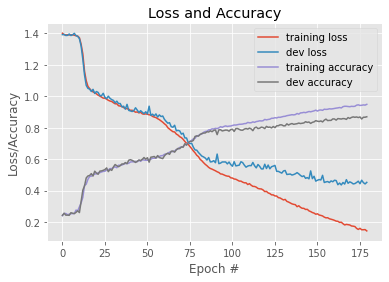

In [51]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright that got us up to 87 accuracy, which is really good. however we are now once again over fitting our data. However our overfitting is not too extreme, so I wager that our data is not the problem. The next apporach I am going to show is regularzation. In this I imagine that l1 is not going to help much as all features should be important in determining what hand position maps to what imput



Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 9.9229 - accuracy: 0.2483 - val_loss: 1.4672 - val_accuracy: 0.2437
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4616 - accuracy: 0.2471 - val_loss: 1.4622 - val_accuracy: 0.2424
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4597 - accuracy: 0.2594 - val_loss: 1.4653 - val_accuracy: 0.2437
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4620 - accuracy: 0.2516 - val_loss: 1.4662 - val_accuracy: 0.2437
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4610 - accuracy: 0.2499 - val_loss: 1.4653 - val_accuracy: 0.2437
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4624 - accuracy: 0.2469 - val_loss: 1.4641 - val_accuracy: 0.2424
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 1.4623 - accuracy: 0.2546 - val_loss: 1.4568 - val_accuracy: 0.2582

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


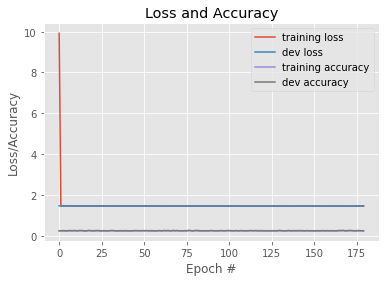

In [61]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.01, l2 = 0.000)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As Expected L1 regularzation is not a good thing for this model, Interestingly neither is L2 after running numerous tests the both give a accuracy of 24%

In [ ]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.01, l2 = 0.000)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()